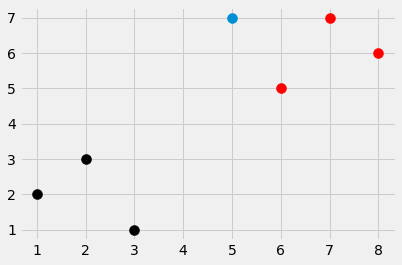

In [1]:
#Part 1: KNN Algorithm
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
import warnings
style.use('fivethirtyeight')

dataset = {'k':[[1,2],[2,3],[3,1]] , 'r':[[6,5],[7,7],[8,6]]}

new_features= [5,7]

for i in dataset:
  for ii in dataset[i]:
    plt.scatter(ii[0],ii[1], s=100, color=i)
plt.scatter(new_features[0],new_features[1],s=100)

plt.show()

[('r', 3)]
r


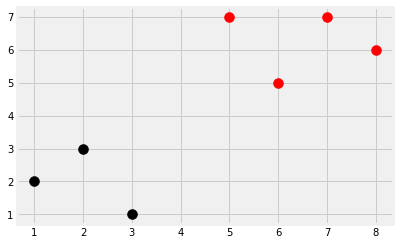

In [7]:
#Part 2: KNN Algorithm
def k_nearest_neighbors(data, predict, k = 3):
  if len(data)>k:
    warnings.warn('K is set to a value that is less than the number of voting groups!')

  distances = []

  for group in data:
    for features in data[group]:
      #euclidean_distance = np.sqrt( np.sum(( np.array(features) - np.array(predict))**2) )
      euclidean_distance = np.linalg.norm( np.array(features) - np.array(predict))
      distances.append([ euclidean_distance, group])
  
  votes = [ i[1] for i in sorted(distances) [:k]]

  print(Counter(votes).most_common(1))
  vote_result = Counter(votes).most_common(1)[0][0]
  return vote_result
result= k_nearest_neighbors(dataset, new_features, k = 3)
print(result)

for i in dataset:
  for ii in dataset[i]:
    plt.scatter(ii[0],ii[1], s=100, color=i)
plt.scatter(new_features[0],new_features[1],s=100, color=result)

plt.show()

In [ ]:
#KNN with scikitlearn